# **Recovery Status Data - Exploratory Data Analysis**

*Recovery status is measured using several tests and metrics to inform recovery strategies throughout the season.
This dataset contains simulated data for 1 player.*

This notebook is organized in the following sections:

* [Part 0 - Preliminary Steps](#0)
    * [Part 0.1 - Importing the Necessary Libraries](#0.1)
    * [Part 0.2 - Reading the Recovery Status Data Dataset](#0.2)

* [Part 1 - Data Cleaning/Wrangling](#1)
    * [Part 1.1 - Preliminary Analysis of the Dataset](#1.1)
    * [Part 1.2 - Dealing with Duplicates](#1.2)
    * [Part 1.3 - Ensuring Correct Data Types](#1.3)
    * [Part 1.4 - Dealing with Null/Missing Values](#1.4)
    * [Part 1.5 - Final Checks](#1.5)

* [Part 2 - Exploratory Data Analysis](#2)

---

<a id='0'></a>
## Part 0 - Preliminary Steps

<a id='0.1'></a>
### Part 0.1 - Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

<a id='0.2'></a>
### Part 0.2 - Reading the Recovery Status Data Dataset

In [2]:
recovery_status_data = pd.read_csv('../data/raw/CFC_Recovery_status_Data.csv')

---

<a id='1'></a>
## Part 1 - Data Cleaning/Wrangling

<a id='1.1'></a>
### Part 1.1 - Preliminary Analysis of the Dataset

Each row represents a category with an associated metric, except for rows with the `emboss_baseline_score` (it is a pre-calculated aggregated “total” category that represents the overall recovery score). Therefore for each day there are 13 rows, as there are 6 categories, 2 metrics as well as the overall recovery score.

In [3]:
recovery_status_data.head(24)

,sessionDate,seasonName,metric,category,value
0,02/07/2023,2023/2024,bio_baseline_completeness,bio,0.0
1,02/07/2023,2023/2024,bio_baseline_composite,bio,NaN
2,02/07/2023,2023/2024,emboss_baseline_score,total,NaN
3,02/07/2023,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range,0.0
4,02/07/2023,2023/2024,msk_joint_range_baseline_composite,msk_joint_range,NaN
5,02/07/2023,2023/2024,msk_load_tolerance_baseline_completeness,msk_load_tolerance,0.0
6,02/07/2023,2023/2024,msk_load_tolerance_baseline_composite,msk_load_tolerance,NaN
7,02/07/2023,2023/2024,sleep_baseline_completeness,sleep,0.0
8,02/07/2023,2023/2024,sleep_baseline_composite,sleep,NaN
9,02/07/2023,2023/2024,soreness_baseline_completeness,soreness,0.0


In [4]:
recovery_status_data.tail(24)

,sessionDate,seasonName,metric,category,value
8049,12/03/2025,2024/2025,emboss_baseline_score,total,-0.012167
8050,12/03/2025,2024/2025,msk_joint_range_baseline_completeness,msk_joint_range,0.000000
8051,12/03/2025,2024/2025,msk_joint_range_baseline_composite,msk_joint_range,NaN
8052,12/03/2025,2024/2025,msk_load_tolerance_baseline_completeness,msk_load_tolerance,0.000000
8053,12/03/2025,2024/2025,msk_load_tolerance_baseline_composite,msk_load_tolerance,NaN
8054,12/03/2025,2024/2025,sleep_baseline_completeness,sleep,0.806452
8055,12/03/2025,2024/2025,sleep_baseline_composite,sleep,-0.020800
8056,12/03/2025,2024/2025,soreness_baseline_completeness,soreness,0.048387
8057,12/03/2025,2024/2025,soreness_baseline_composite,soreness,-0.100000
8058,12/03/2025,2024/2025,subjective_baseline_completeness,subjective,0.806452


The recovery status data dataset has 8073 rows and 5 columns, with only the `values`column having null/missing values.

In [5]:
recovery_status_data.shape

(8073, 5)

In [6]:
recovery_status_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8073 entries, 0 to 8072
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sessionDate  8073 non-null   object 
 1   seasonName   8073 non-null   object 
 2   metric       8073 non-null   object 
 3   category     8073 non-null   object 
 4   value        5261 non-null   float64
dtypes: float64(1), object(4)
memory usage: 315.5+ KB


<a id='1.2'></a>
### Part 1.2 - Dealing with Duplicates

We checked if there were any duplicate rows. We found there were no duplicate rows.

In [7]:
recovery_status_data.duplicated().any()

False

In [8]:
# Another check for duplicates - just in case
recovery_status_data.duplicated().sum()

0

<a id='1.3'></a>
### Part 1.3 - Ensuring Correct Data Types

Next, we proceeded to ensure whether the data types of all columns were correct/adequate

In [9]:
recovery_status_data.dtypes

sessionDate     object
seasonName      object
metric          object
category        object
value          float64
dtype: object

Given the only column with the incorrect data type was the `sessionDate` (i.e., date) column, we proceeded to transform it to the correct format --> datetime format (%d/%m/%Y).

In [10]:
# Transforming the columns into the correct data type

## Transforming the sessionDate column into datetime format
recovery_status_data['sessionDate'] = pd.to_datetime(recovery_status_data['sessionDate'], format = '%d/%m/%Y')

In [11]:
recovery_status_data.dtypes

sessionDate    datetime64[ns]
seasonName             object
metric                 object
category               object
value                 float64
dtype: object

<a id='1.4'></a>
### Part 1.4 - Dealing with Null/Missing Values

There are approximately 2800 null values in the `value` column, which represents nearly 35% of all values. Null values means that the data was not collected for a specific metric on that particular date. We decided to keep them at this stage in our analysis. We dealt with these null values once we merged all 3 datasets into one dataframe (this can be seen within the `merged_df` notebook). In our Exploratory Data Analysis for this dataset (which can be found below in section 2), we explored the distribution of this feature without null values.

In [12]:
recovery_status_data.isna().sum()

sessionDate       0
seasonName        0
metric            0
category          0
value          2812
dtype: int64

In [13]:
(recovery_status_data.isna().sum() / len(recovery_status_data)) * 100

sessionDate     0.000000
seasonName      0.000000
metric          0.000000
category        0.000000
value          34.832157
dtype: float64

---

<a id='2'></a>
## Part 2 - Exploratory Data Analysis

In [14]:
#Dataset Overview

print("Dataset shape:", recovery_status_data.shape)
print("Columns:", recovery_status_data.columns.tolist())
print("\nPreview:")
print(recovery_status_data.head())

Dataset shape: (8073, 5)
Columns: ['sessionDate', 'seasonName', 'metric', 'category', 'value']

Preview:
  sessionDate seasonName                                 metric  \
0  2023-07-02  2023/2024              bio_baseline_completeness   
1  2023-07-02  2023/2024                 bio_baseline_composite   
2  2023-07-02  2023/2024                  emboss_baseline_score   
3  2023-07-02  2023/2024  msk_joint_range_baseline_completeness   
4  2023-07-02  2023/2024     msk_joint_range_baseline_composite   

          category  value  
0              bio    0.0  
1              bio    NaN  
2            total    NaN  
3  msk_joint_range    0.0  
4  msk_joint_range    NaN  


In [15]:
# Subset to use only valid 'value' rows
recovery_nonnull = recovery_status_data.dropna(subset=['value'])

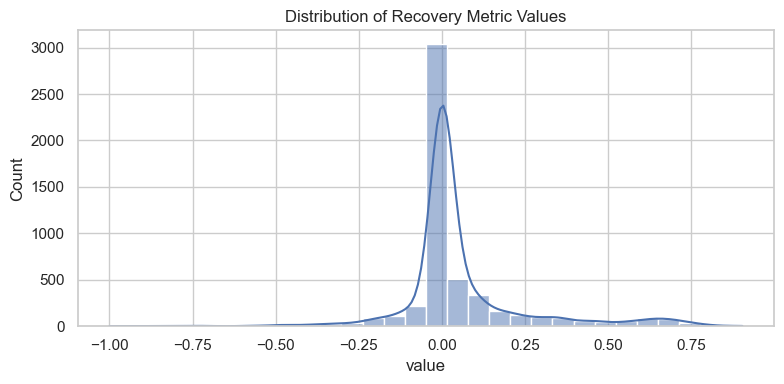

In [16]:
if not recovery_nonnull.empty:
    plt.figure(figsize=(8, 4))
    sns.histplot(recovery_nonnull['value'], kde=True, bins=30)
    plt.title("Distribution of Recovery Metric Values")
    plt.xlabel("value")
    plt.tight_layout()
    plt.show()
else:
    print("No valid values in 'value' column for distribution analysis.")


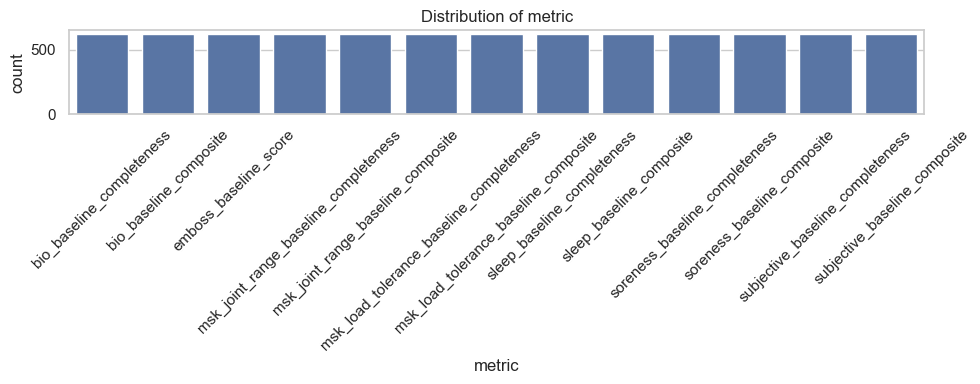

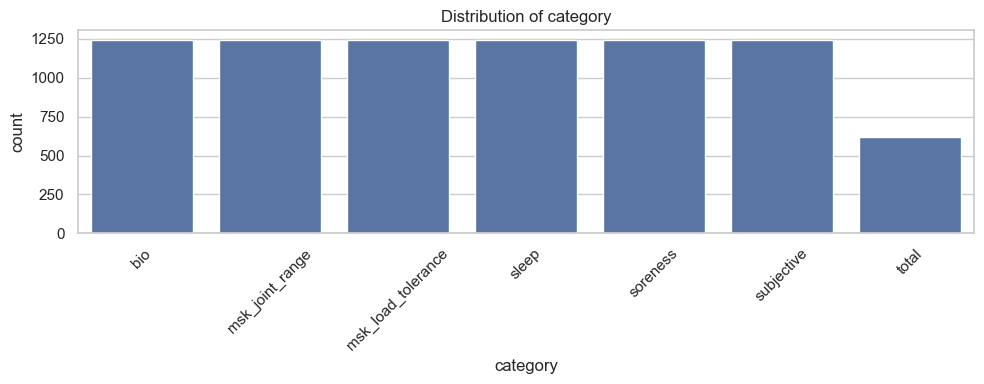

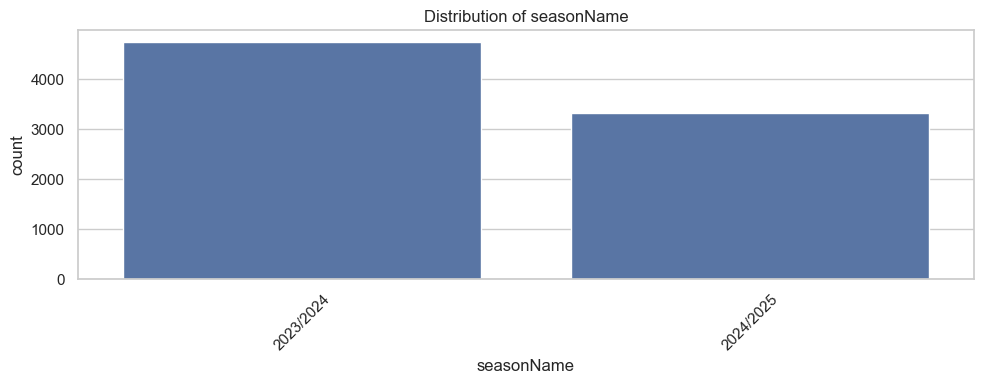

In [17]:
for col in ['metric', 'category', 'seasonName']:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=recovery_status_data, x=col, order=recovery_status_data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


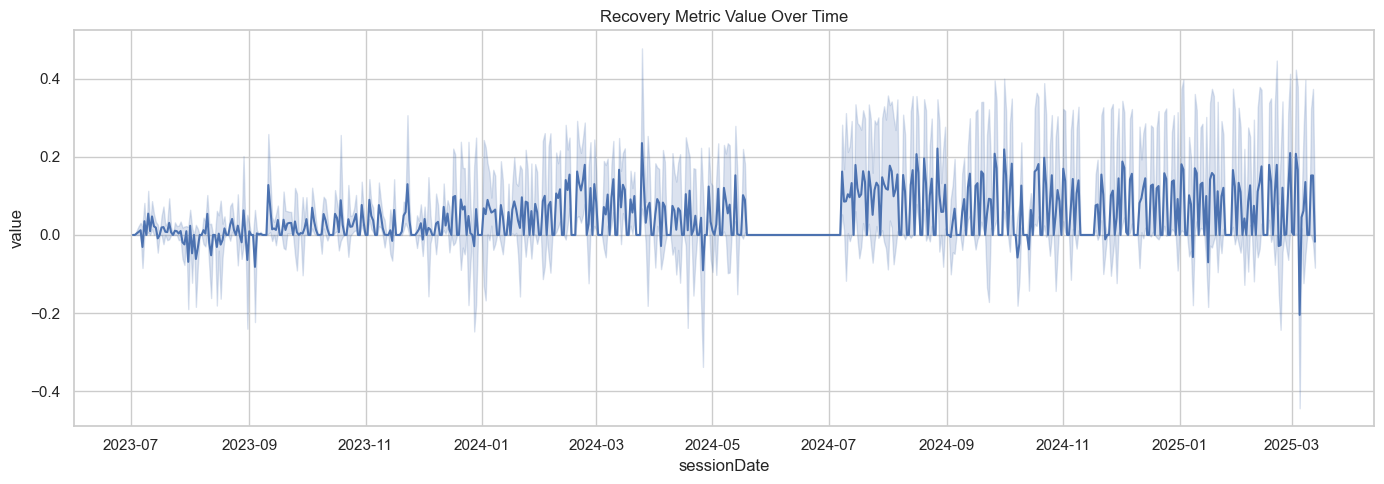

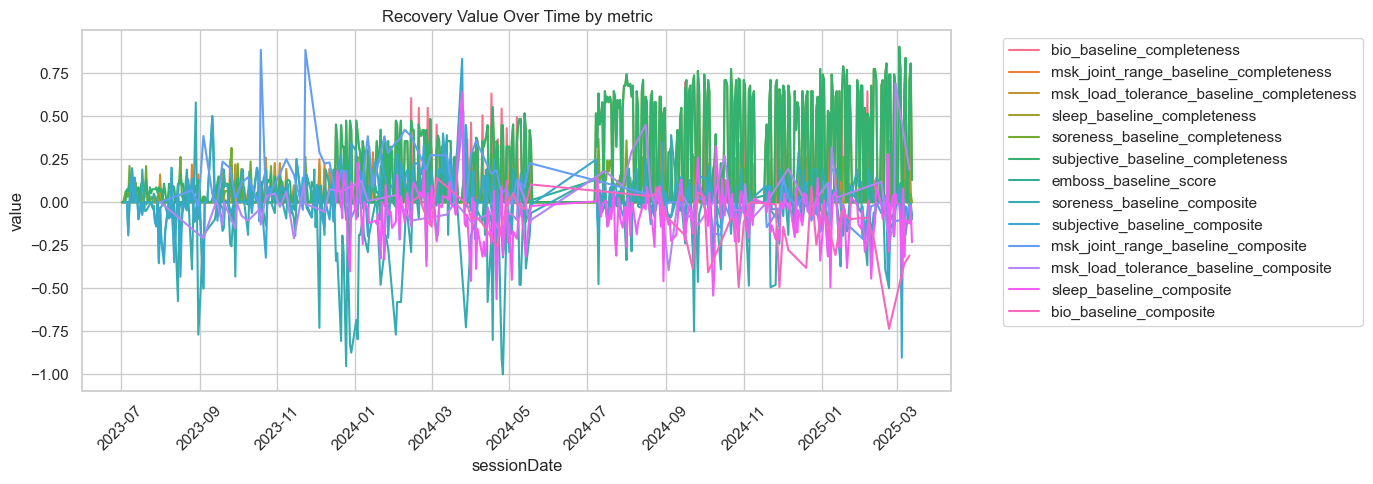

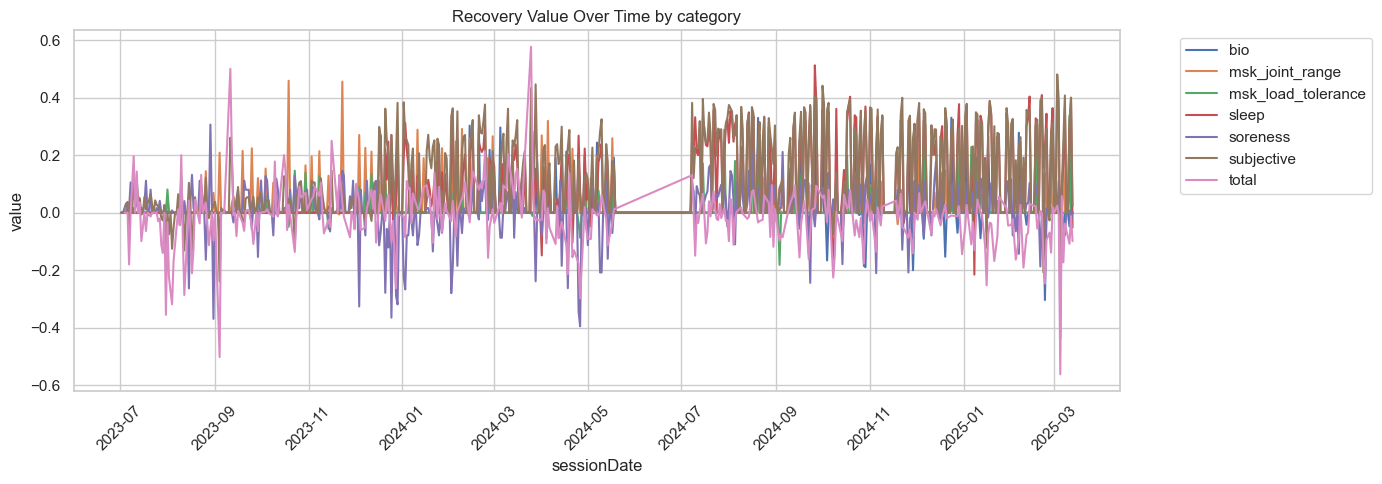

In [18]:
if not recovery_nonnull.empty:
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=recovery_nonnull, x='sessionDate', y='value')
    plt.title("Recovery Metric Value Over Time")
    plt.ylabel("value")
    plt.tight_layout()
    plt.show()

    for col in ['metric', 'category']:
        plt.figure(figsize=(14, 5))
        sns.lineplot(data=recovery_nonnull, x='sessionDate', y='value', hue=col, errorbar=None)
        plt.title(f"Recovery Value Over Time by {col}")
        plt.xticks(rotation=45)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


In [19]:
if not recovery_nonnull.empty:
    grouped_summary = recovery_nonnull.groupby(['seasonName', 'metric', 'category'])['value'] \
        .agg(['count', 'mean', 'std', 'min', 'max']) \
        .sort_values(by='count', ascending=False)

    print("Top metric/category/season combinations by count:")
    print(grouped_summary.head(10))
else:
    print("No valid 'value' entries for grouped summary.")



Top metric/category/season combinations by count:
                                                                        count  \
seasonName metric                                   category                    
2023/2024  bio_baseline_completeness                bio                   365   
           subjective_baseline_completeness         subjective            365   
           msk_joint_range_baseline_completeness    msk_joint_range       365   
           msk_load_tolerance_baseline_completeness msk_load_tolerance    365   
           sleep_baseline_completeness              sleep                 365   
           soreness_baseline_completeness           soreness              365   
2024/2025  subjective_baseline_completeness         subjective            256   
           soreness_baseline_completeness           soreness              256   
           sleep_baseline_completeness              sleep                 256   
           msk_load_tolerance_baseline_completeness msk_loa